In [6]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=1)

In [5]:
x_train

array([[4.93200e-02, 3.30000e+01, 2.18000e+00, ..., 1.84000e+01,
        3.96900e+02, 7.53000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.18000e+00],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       ...,
       [1.00080e-01, 0.00000e+00, 2.46000e+00, ..., 1.78000e+01,
        3.96900e+02, 5.68000e+00],
       [1.49632e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.41600e+02, 1.32800e+01],
       [7.75223e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72210e+02, 1.62300e+01]])

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [8]:
model.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mae',]
)

In [10]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


13/13 [==============================] - 1s 1ms/step - loss: 8.2046 - mae: 8.2046
Epoch 2/50
13/13 [==============================] - 0s 917us/step - loss: 5.7679 - mae: 5.7679
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 5.8839 - mae: 5.8839
Epoch 4/50
13/13 [==============================] - 0s 917us/step - loss: 5.9849 - mae: 5.9849
Epoch 5/50
13/13 [==============================] - 0s 833us/step - loss: 5.3016 - mae: 5.3016
Epoch 6/50
13/13 [==============================] - 0s 917us/step - loss: 5.0786 - mae: 5.0786
Epoch 7/50
13/13 [==============================] - 0s 1000us/step - loss: 5.2107 - mae: 5.2107
Epoch 8/50
13/13 [==============================] - 0s 833us/step - loss: 4.9843 - mae: 4.9843
Epoch 9/50
13/13 [==============================] - 0s 833us/step - loss: 5.0588 - mae: 5.0588
Epoch 10/50
13/13 [==============================] - 0s 833us/step - loss: 4.9905 - mae: 4.9905
Epoch 11/50
13/13 [==============================]

In [15]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 1000us/step


In [21]:
y_pred.shape[0]

102

In [22]:
x_plot = np.linspace(1, y_pred.shape[0], y_pred.shape[0])
x_plot.shape

(102,)

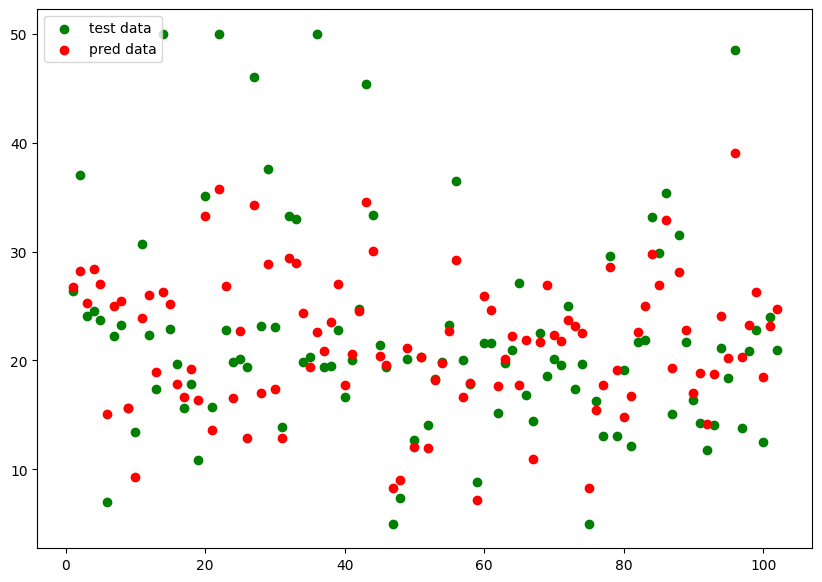

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x_plot, y_test, c='g', label='test data'),
plt.scatter(x_plot, y_pred, c='r', label='pred data'),
plt.legend()
plt.show()

In [30]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [ ]:
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

In [37]:
number_cols = x_train_df.select_dtypes(include='number')
number_cols = list(number_cols.columns)
number_cols

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [26]:
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
1,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
2,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
3,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
4,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19


In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [38]:
ct = make_column_transformer(
    (MinMaxScaler(), number_cols)
)

In [39]:
ct.fit(x_train_df)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])])

In [40]:
x_train_normal = ct.transform(x_train_df)
x_test_normal = ct.transform(x_test_df)

In [42]:
model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])
model_normal.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mae',]
)
model.fit(x_train_normal, y_train, epochs = 50)

Epoch 1/50
13/13 [==============================] - 0s 917us/step - loss: 22.0543 - mae: 22.0543
Epoch 2/50
13/13 [==============================] - 0s 917us/step - loss: 20.8881 - mae: 20.8881
Epoch 3/50
13/13 [==============================] - 0s 833us/step - loss: 18.3099 - mae: 18.3099
Epoch 4/50
13/13 [==============================] - 0s 833us/step - loss: 14.1356 - mae: 14.1356
Epoch 5/50
13/13 [==============================] - 0s 916us/step - loss: 10.2782 - mae: 10.2782
Epoch 6/50
13/13 [==============================] - 0s 917us/step - loss: 8.5224 - mae: 8.5224
Epoch 7/50
13/13 [==============================] - 0s 917us/step - loss: 7.8418 - mae: 7.8418
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 7.2571 - mae: 7.2571
Epoch 9/50
13/13 [==============================] - 0s 1000us/step - loss: 6.7221 - mae: 6.7221
Epoch 10/50
13/13 [==============================] - 0s 917us/step - loss: 6.2944 - mae: 6.2944
Epoch 11/50
13/13 [=====================

In [43]:
model.evaluate(x_test_normal, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.4003 - mae: 3.4003


[3.4002599716186523, 3.4002599716186523]